# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import requests

baseUrl = 'http://www.tng-project.org/api/'
headers = {"api-key":"faa13a2a08044bab37b96fc86e517a15"}

def get(path, params=None):
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically
    return r

#Coding

In [ ]:
r = get(baseUrl)

In [ ]:
r.keys()

dict_keys(['simulations'])

In [ ]:
len(r['simulations']) #number of current simulations

66

In [ ]:
r['simulations'][0] #info of first simulation

{'name': 'Illustris-1',
 'num_snapshots': 134,
 'url': 'http://www.tng-project.org/api/Illustris-1/'}

In [ ]:
names = [sim['name'] for sim in r['simulations']]
names        #names of every simulation available

['Illustris-1',
 'Illustris-1-Dark',
 'Illustris-2',
 'Illustris-2-Dark',
 'Illustris-3',
 'Illustris-3-Dark',
 'TNG100-1',
 'TNG100-1-Dark',
 'TNG100-2',
 'TNG100-2-Dark',
 'TNG100-3',
 'TNG100-3-Dark',
 'TNG300-3',
 'TNG300-2-Dark',
 'TNG300-2',
 'TNG300-1-Dark',
 'TNG300-1',
 'TNG300-3-Dark',
 'TNG50-1',
 'TNG50-1-Dark',
 'TNG50-2',
 'TNG50-2-Dark',
 'TNG50-3',
 'TNG50-3-Dark',
 'TNG50-4',
 'TNG50-4-Dark',
 'TNG-Cluster',
 'Illustris-1-Subbox0',
 'Illustris-1-Subbox1',
 'Illustris-1-Subbox2',
 'Illustris-1-Subbox3',
 'Illustris-2-Subbox0',
 'Illustris-2-Subbox1',
 'Illustris-2-Subbox2',
 'Illustris-2-Subbox3',
 'Illustris-3-Subbox0',
 'Illustris-3-Subbox1',
 'Illustris-3-Subbox2',
 'Illustris-3-Subbox3',
 'TNG100-1-Subbox0',
 'TNG100-1-Subbox1',
 'TNG100-2-Subbox0',
 'TNG100-2-Subbox1',
 'TNG100-3-Subbox0',
 'TNG100-3-Subbox1',
 'TNG300-3-Subbox1',
 'TNG300-3-Subbox2',
 'TNG300-3-Subbox0',
 'TNG300-2-Subbox1',
 'TNG300-2-Subbox2',
 'TNG300-2-Subbox0',
 'TNG300-1-Subbox1',
 'TNG300-1

#Additional simulations

In [ ]:
i = names.index('Illustris-3')
i

4

In [ ]:
sim = get( r['simulations'][i]['url'] )
sim.keys()

dict_keys(['name', 'description', 'name_alt', 'boxsize', 'z_start', 'z_final', 'cosmology', 'omega_0', 'omega_L', 'omega_B', 'hubble', 'physics_model', 'has_cooling', 'has_starformation', 'has_winds', 'has_blackholes', 'mass_gas', 'mass_dm', 'softening_dm_comoving', 'softening_stars_comoving', 'softening_blackholes_comoving', 'softening_gas_comoving', 'softening_dm_max_phys', 'softening_stars_max_phys', 'softening_blackholes_max_phys', 'softening_gas_max_phys', 'softening_gas_factor', 'softening_gas_comoving_min', 'num_dm', 'num_tr_mc', 'num_tr_vel', 'longids', 'is_uniform', 'is_zoom', 'is_subbox', 'num_files_snapshot', 'num_files_groupcat', 'num_files_rockstar', 'num_files_lhalotree', 'num_files_sublink', 'num_files_ctrees', 'filesize_lhalotree', 'filesize_sublink', 'filesize_ctrees', 'filesize_ics', 'filesize_simulation', 'has_fof', 'has_subfind', 'has_rockstar', 'has_lhalotree', 'has_sublink', 'has_ctrees', 'permission_required', 'num_snapshots', 'url', 'parent_simulation', 'child_s

In [ ]:
sim['num_dm']

94196375

In [ ]:
sim['snapshots'] #link to snapshots list

'http://www.tng-project.org/api/Illustris-3/snapshots/'

In [ ]:
snaps = get( sim['snapshots'] )
len(snaps) #the amount of snapshots

136

In [ ]:
snaps[-1] #inspecting the last snapshot on the list

{'number': 135,
 'redshift': 2.2204460492503099e-16,
 'num_groups_subfind': 121209,
 'url': 'http://www.tng-project.org/api/Illustris-3/snapshots/135/'}

In [ ]:
snap = get( snaps[-1]['url'] )
snap #getting detailed info on last snapshot.   #"subhalo links to all the child subhalos which belong to this snapshot"

{'simulation': 'http://www.tng-project.org/api/Illustris-3/',
 'number': 135,
 'redshift': 2.2204460492503099e-16,
 'num_gas': 87571556,
 'num_dm': 94196375,
 'num_trmc': 94196375,
 'num_stars': 4388167,
 'num_bhs': 33582,
 'num_groups_fof': 131727,
 'num_groups_subfind': 121209,
 'num_groups_rockstar': 0,
 'filesize_snapshot': 23437820660.0,
 'filesize_groupcat': 114056740.0,
 'filesize_rockstar': 0.0,
 'url': 'http://www.tng-project.org/api/Illustris-3/snapshots/135/',
 'subhalos': 'http://www.tng-project.org/api/Illustris-3/snapshots/135/subhalos/',
 'vis': {'groupcat_sfms': 'http://www.tng-project.org/api/Illustris-3/snapshots/135/subhalos/plot.png?xQuant=mstar2_log&yQuant=ssfr&xlim=9.0%2C11.0',
  'groupcat_sizemass': 'http://www.tng-project.org/api/Illustris-3/snapshots/135/subhalos/plot.png?xQuant=mstar2_log&yQuant=size_stars',
  'groupcat_mz_gas': 'http://www.tng-project.org/api/Illustris-3/snapshots/135/subhalos/plot.png?xQuant=mstar2_log&yQuant=Z_gas',
  'groupcat_mz_stars': '

In [ ]:
subs = get(snap['subhalos'])  #next 3 code cells to request and inspect subhalos endpoint
subs.keys()

dict_keys(['count', 'next', 'previous', 'results'])

In [ ]:
subs['count']

121209

In [ ]:
subs['next']

'http://www.tng-project.org/api/Illustris-3/snapshots/135/subhalos/?limit=100&offset=100'

In [ ]:
len(subs['results']) #default page size

100

In [ ]:
subs = get( snap['subhalos'], {'limit':220} )
len(subs['results']) #how to override the default page size

220

In [ ]:
subs['next'] #url to new overriden page limit

'http://www.tng-project.org/api/Illustris-3/snapshots/135/subhalos/?limit=220&offset=220'

In [ ]:
subs['results'][0] #minimal info of first on the list

{'id': 0,
 'sfr': 4.11098,
 'mass_log_msun': 14.554690443287308,
 'url': 'http://www.tng-project.org/api/Illustris-3/snapshots/135/subhalos/0/'}

ordering of subhalo searches

In [ ]:
subs = get( snap['subhalos'], {'limit':20, 'order_by':'-mass_stars'} )

len(subs['results']) #first twenty subhalos sorted by descending stellar mass.

20

In [ ]:
[ subs['results'][i]['id'] for i in range(5) ]

[0, 1030, 2074, 2302, 2843]

# Ordering

In [ ]:
sub = get( subs['results'][1]['url'] ) #full subhalo information for ID==1030
#desc_sfid = -1 and desc_snap = -1 indicate that this subhalo has no descendant in the SubLink trees
#prog_sfid = 1004 and prog_snap = 134 indicate that the main progenitor of this subhalo has ID 1004 at snapshot 134
#primary_flag = 1 indicates that this is the central subhalo of this FoF halo.
sub

{'snap': 135,
 'id': 1030,
 'bhmdot': 0.199144,
 'cm_x': 10992.8,
 'cm_y': 50807.7,
 'cm_z': 47671.3,
 'gasmetallicity': 0.00787963,
 'gasmetallicityhalfrad': 0.0167215,
 'gasmetallicitymaxrad': 0.053106,
 'gasmetallicitysfr': 0.0510764,
 'gasmetallicitysfrweighted': 0.0518217,
 'pos_x': 10908.2,
 'pos_y': 50865.5,
 'pos_z': 47651.8,
 'halfmassrad': 527.237,
 'halfmassrad_gas': 660.879,
 'halfmassrad_dm': 510.476,
 'halfmassrad_stars': 50.759,
 'halfmassrad_bhs': 0.0,
 'len': 1113373,
 'len_gas': 448911,
 'len_dm': 624445,
 'len_stars': 39946,
 'len_bhs': 71,
 'mass': 20463.1,
 'mass_gas': 2678.49,
 'mass_dm': 17620.2,
 'mass_stars': 158.333,
 'mass_bhs': 6.04079,
 'massinhalfrad': 496.772,
 'massinhalfrad_gas': 5.39936,
 'massinhalfrad_dm': 406.895,
 'massinhalfrad_stars': 79.1619,
 'massinhalfrad_bhs': 5.31633,
 'massinmaxrad': 5.28624,
 'massinmaxrad_gas': 0.007397,
 'massinmaxrad_dm': 0.0,
 'massinmaxrad_stars': 0.015315,
 'massinmaxrad_bhs': 5.26353,
 'massinrad': 1352.77,
 'massi

In [ ]:
url = sub['related']['parent_halo'] + "info.json" #group catalog field dump of the parent FoF halo
url

'http://www.tng-project.org/api/Illustris-3/snapshots/135/halos/2/info.json'

In [ ]:
parent_fof = get(url)
parent_fof.keys()

dict_keys(['SimulationName', 'SnapshotNumber', 'InfoType', 'InfoID', 'GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupFuzzOffsetType', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200', 'StellarMasses', 'TracerLength', 'TracerOffset'])

info.json endpoints_______(raw extraction from group catalogs)

In [ ]:
def get(path, params=None):            #extending helper function to return the subhalo itslef
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically

    if 'content-disposition' in r.headers:
        filename = r.headers['content-disposition'].split("filename=")[1]
        with open(filename, 'wb') as f:
            f.write(r.content)
        return filename # return the filename string

    return r

In [ ]:
import h5py          #main progenitor branch from the SubLink merger trees of this subhalo.
mpb1 = get( sub['trees']['sublink_mpb'] ) # file saved, mpb1 contains the filename

f = h5py.File(mpb1,'r')
print(f.keys())

<KeysViewHDF5 ['DescendantID', 'FirstProgenitorID', 'FirstSubhaloInFOFGroupID', 'Group_M_Crit200', 'Group_M_Mean200', 'Group_M_TopHat200', 'LastProgenitorID', 'MainLeafProgenitorID', 'Mass', 'MassHistory', 'NextProgenitorID', 'NextSubhaloInFOFGroupID', 'NumParticles', 'RootDescendantID', 'SnapNum', 'SubfindID', 'SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloCM', 'SubhaloGasMetallicity', 'SubhaloGasMetallicityHalfRad', 'SubhaloGasMetallicityMaxRad', 'SubhaloGasMetallicitySfr', 'SubhaloGasMetallicitySfrWeighted', 'SubhaloGrNr', 'SubhaloHalfmassRad', 'SubhaloHalfmassRadType', 'SubhaloID', 'SubhaloIDMostbound', 'SubhaloIDRaw', 'SubhaloLen', 'SubhaloLenType', 'SubhaloMass', 'SubhaloMassInHalfRad', 'SubhaloMassInHalfRadType', 'SubhaloMassInMaxRad', 'SubhaloMassInMaxRadType', 'SubhaloMassInRad', 'SubhaloMassInRadType', 'SubhaloMassType', 'SubhaloParent', 'SubhaloPos', 'SubhaloSFR', 'SubhaloSFRinHalfRad', 'SubhaloSFRinMaxRad', 'SubhaloSFRinRad', 'SubhaloSpin', 'SubhaloStarMetallicity', 'SubhaloStar

In [ ]:
print(len(f['SnapNum']))

104


In [ ]:
print (f['SnapNum'][:])

[135 134 133 132 131 130 129 128 127 126 125 124 123 122 121 120 119 118
 117 116 115 114 113 112 111 110 109 108 107 106 105 104 103 102 101 100
  99  98  97  96  95  94  93  92  91  90  89  88  87  86  85  84  83  82
  81  80  79  78  77  76  75  74  73  72  71  70  69  68  67  66  65  64
  63  62  61  60  59  58  57  56  55  54  53  52  51  50  49  48  47  46
  45  44  43  42  41  40  39  38  37  36  35  34  33  32]


# Available fields in tree returns

In [ ]:
mpb2 = get( sub['trees']['lhalotree_mpb'] ) # file saved, mpb2 contains the filename
with h5py.File(mpb2,'r') as f:
    print (len(f['SnapNum']))

104


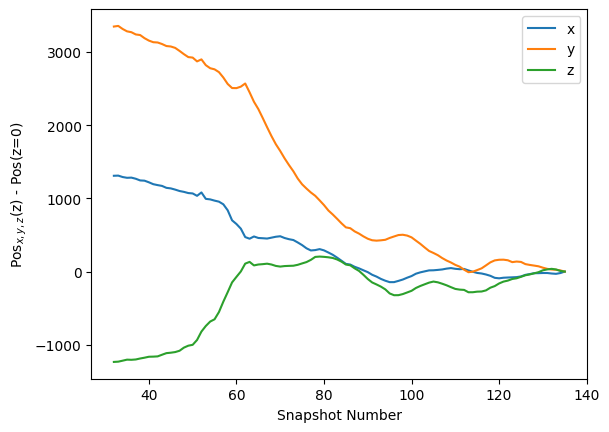

In [ ]:
with h5py.File(mpb2,'r') as f:
    pos = f['SubhaloPos'][:]
    snapnum = f['SnapNum'][:]
    subid = f['SubhaloNumber'][:]
for i in range(3):
    plt.plot(snapnum,pos[:,i] - pos[0,i], label=['x','y','z'][i])
plt.legend()
plt.xlabel('Snapshot Number')
plt.ylabel('Pos$_{x,y,z}$(z) - Pos(z=0)');

getting a cuttout of the data

In [ ]:
#goal: an image of the gas density around the 𝑧=1 progenitor of our subhalo.

In [ ]:
url = sim['snapshots'] + "z=1/" #this and next cell to get the snapshot
url

'http://www.tng-project.org/api/Illustris-3/snapshots/z=1/'

In [ ]:
snap = get(url)
snap['number'], snap['redshift']

(85, 0.9972942257819399)

In [ ]:
i = np.where(snapnum == 85) #Find the target Subfind ID at snapshot 85 using the Sublink tree
subid[i]

In [ ]:
sub_prog_url = "http://www.tng-project.org/api/Illustris-3/snapshots/85/subhalos/185/"
sub_prog = get(sub_prog_url)
sub_prog['pos_x'], sub_prog['pos_y']
#get subhalo details

(11013.3, 51469.6)

In [ ]:
cutout_request = {'gas':'Coordinates,Masses'}
cutout = get(sub_prog_url+"cutout.hdf5", cutout_request)
#cutout of gas coordinates and masses

In [ ]:
#2d histogram of gas distribution on this sub halo

<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:8: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:8: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipython-input-2870291827.py:7: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta x$ [ckpc/h]')
/tmp/ipython-input-2870291827.py:8: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta y$ [ckpc/h]');


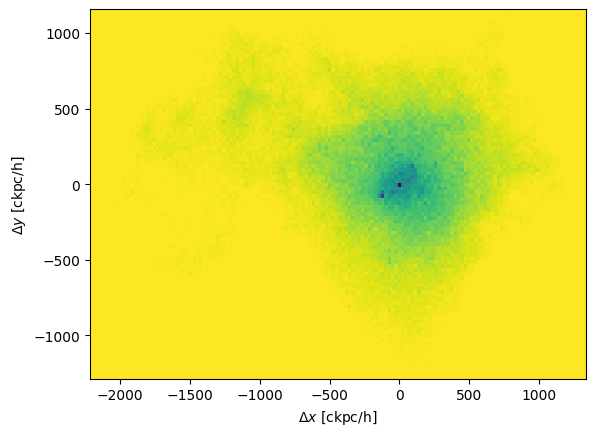

In [ ]:
with h5py.File(cutout,'r') as f:
    x = f['PartType0']['Coordinates'][:,0] - sub_prog['pos_x']
    y = f['PartType0']['Coordinates'][:,1] - sub_prog['pos_y']
    dens = np.log10(f['PartType0']['Masses'][:])

plt.hist2d(x,y,weights=dens,bins=[150,100])
plt.xlabel('$\Delta x$ [ckpc/h]')
plt.ylabel('$\Delta y$ [ckpc/h]');